In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

import torch
import pandas as pd
import os
import sys

parent = os.path.abspath(os.path.join('..'))
sys.path.append(parent)

from data import ImagesLibary
from models.models import AttributeClassifier

In [3]:
classifier = AttributeClassifier(preprocess=True)
dataset = ImagesLibary(root='/storage2/datasets/facial-hq/test/images/', image_size=256)
loader = torch.utils.data.DataLoader(dataset, batch_size=16)


batch = next(iter(loader))

In [5]:
images = batch['image']
with torch.no_grad():
    predicts = classifier(images)

predicts = predicts > 0.5

In [9]:
from data import ID_TO_CLS


attrs = list()
for i in range(len(predicts)):
    attr = list()
    for j in range(len(ID_TO_CLS)):
        if predicts[i][j]:
            attr.append(ID_TO_CLS[j])
    attrs.append(attr)

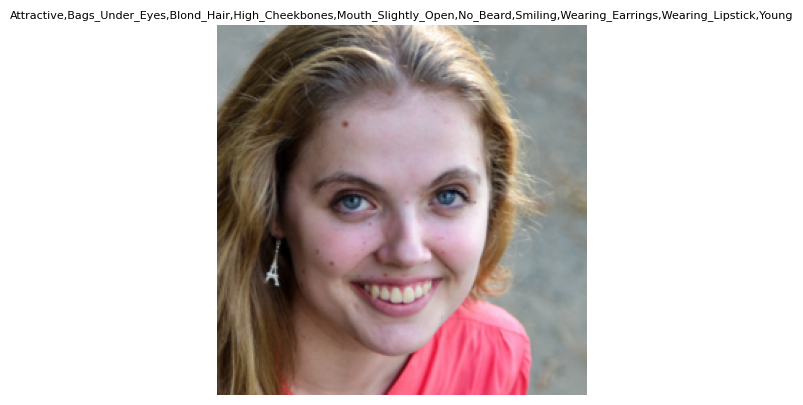

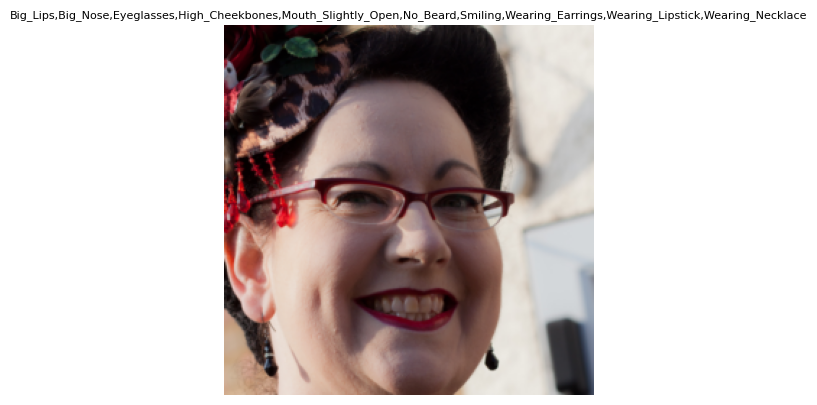

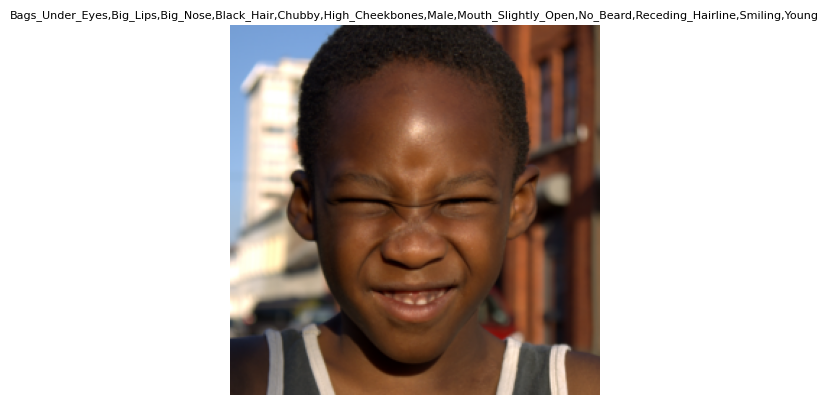

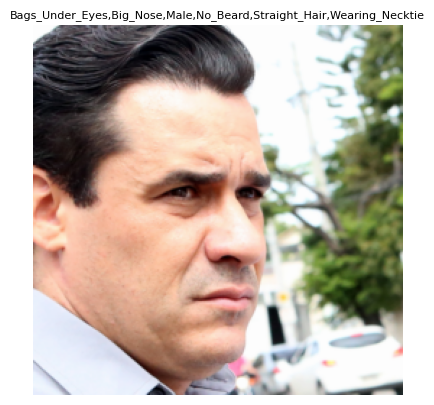

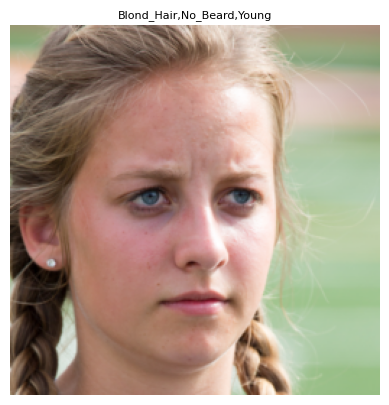

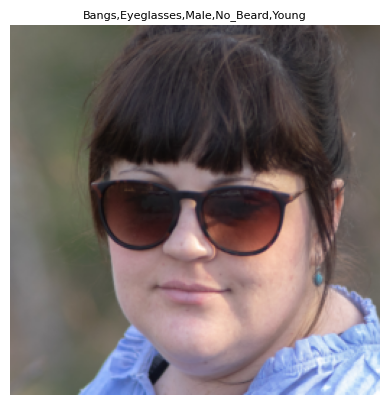

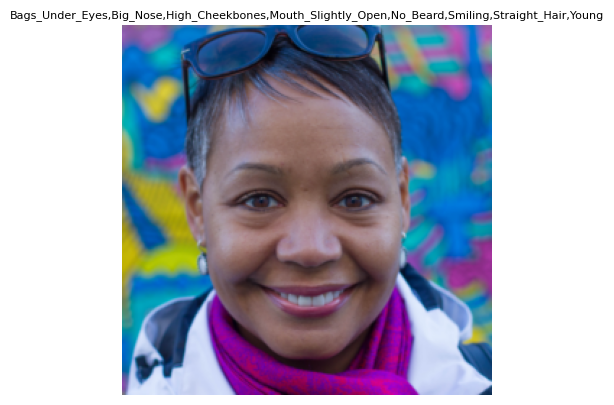

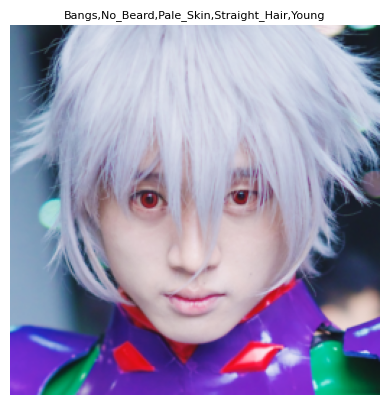

In [12]:
def visualize_attr(image, attr):
    plt.imshow(image)
    plt.axis('off')
    plt.title('{}'.format(','.join(attr)), fontsize=8)
    plt.show()
    

for i in range(8, 16):
    image = (((images[i] + 1.0) / 2.0).permute(1, 2, 0) * 255.0).cpu().numpy().astype('uint8')
    visualize_attr(image, attrs[i])